<a href="https://colab.research.google.com/github/Broklink/Data-test/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

## Data Gathering

In [67]:
# Connect to GoogleDrive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# Read a file from GoogleDrive.
file_path = '/content/drive/MyDrive/Colab Notebooks/vgsales.csv'
df = pd.read_csv(file_path)

In [69]:
# Display the first 5 rows to get a quick look at the data structure.
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [70]:
# Check total length of dataset.
len(df)

16598

In [71]:
# Check for data type in each column.
df.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [72]:
# 1. สร้าง label (Popularity Class)
df_clean = df_clean.copy()

df_clean['Sales_Class'] = pd.cut(
    df_clean['Global_Sales'],
    bins=[-1, 0.5, 2, float('inf')],
    labels=['Low', 'Medium', 'High']
)

label = 'Sales_Class'

# ------------------------------
# 2. เลือก features
exclude_columns = ['Name', 'Global_Sales', 'label']
features = [x for x in df_clean.columns if x not in exclude_columns]

X = df_clean[features]
y = df_clean[label]

In [73]:
print(df_clean.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Sales_Class'],
      dtype='object')


In [74]:
# 2. เลือก features
exclude_columns = ['Name', 'Global_Sales', 'label']
features = [x for x in df_clean.columns if x not in exclude_columns]

X = df_clean[features]
y = df_clean[label]

## Data Preprocessing

### Universal Data Cleaning

#### Duplicate Data

In [75]:
# Check duplicate rows.
df[df.duplicated(keep=False)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


#### Missing Data

In [161]:
# Check for missing values in each column.
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [162]:
# Remove missing target.
# ลบเฉพาะแถวที่ Year หรือ Publisher เป็น NaN
df_clean = df.dropna(subset=["Year", "Publisher"])

print(len(df_clean))   # ดูจำนวนแถวหลังลบ

16291


In [163]:
# Recheck missing values.
df_clean.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


#### Distribution

In [164]:
# Check continuous features values.
df_clean.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [165]:
# ใส่อีกรอบทำไมไม่รู้ แต่ต้องใส่ไม่งั้น Run ไม่ได้!!!
df_clean = df_clean.copy()

df_clean['Sales_Class'] = pd.cut(
    df_clean['Global_Sales'],
    bins=[-1, 0.5, 2, float('inf')],
    labels=['Low', 'Medium', 'High']
)

label = 'Sales_Class'


In [166]:
# Check categorical features values.
df_clean['Sales_Class'].value_counts()

,count
Sales_Class,
Low,12401
Medium,3054
High,836


In [167]:
# Recheck data type.
df_clean.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


### Data Exploration

In [168]:
df.sort_values(by=['Name']).head()[['Name', 'Global_Sales']]

,Name,Global_Sales
4754,'98 Koshien,0.41
8357,.hack//G.U. Vol.1//Rebirth,0.17
7107,.hack//G.U. Vol.2//Reminisce,0.23
8602,.hack//G.U. Vol.2//Reminisce (jp sales),0.16
8304,.hack//G.U. Vol.3//Redemption,0.17


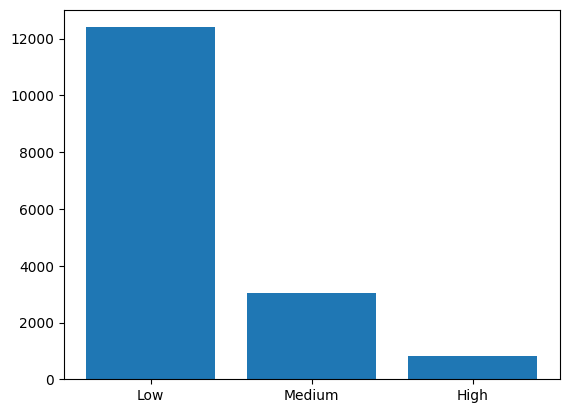

In [169]:
# Check label distribution.
count_df = df_clean[label].value_counts().reset_index()
count_df.columns = [label, 'count']
plt.bar(count_df[label], count_df['count'])
plt.show()

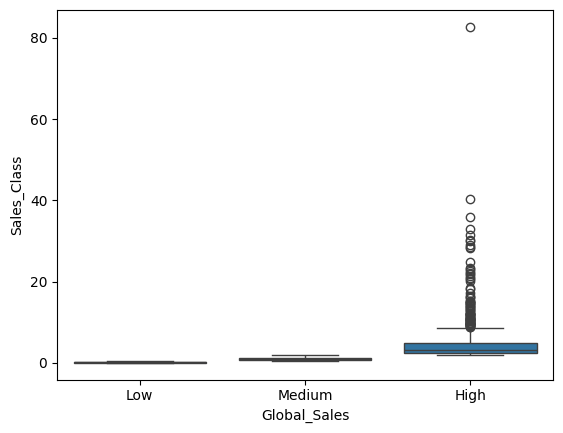

In [170]:
# Check continuous features relationship.
for col in ['Global_Sales']:
  plt.figure()
  sns.boxplot(x=label, y=col, data=df_clean)
  plt.xlabel(col)
  plt.ylabel(label)
  plt.show()

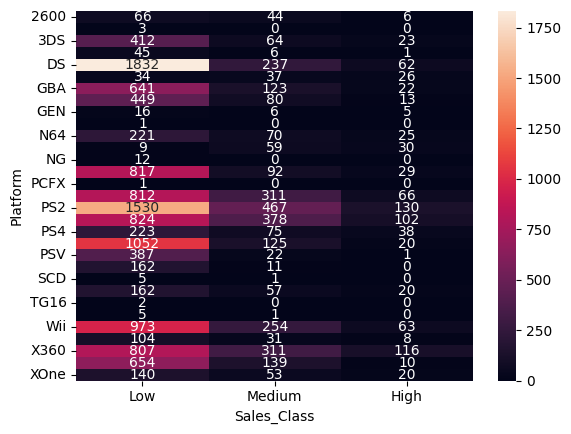

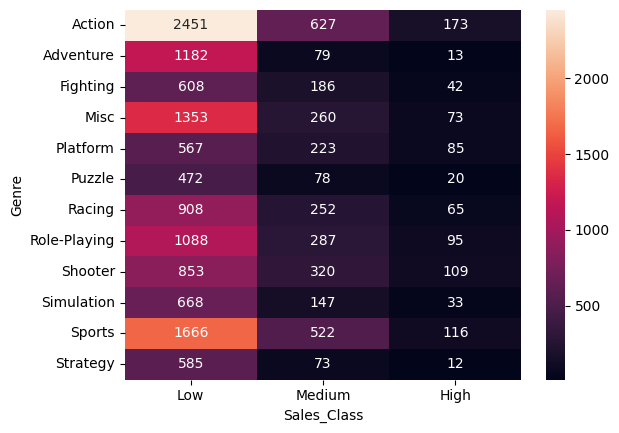

In [86]:
# Check categorical features relationship.
for col in ['Platform','Genre',]:
  plt.figure()
  cross_tab = pd.crosstab(df_clean[col], df_clean[label])
  sns.heatmap(cross_tab, annot=True, fmt='.0f')
  plt.show()

In [273]:
for col in ['Publisher']:
  plt.figure(figsize=(10,1000))
  cross_tab = pd.crosstab(df_clean[col], df_clean[label])
  sns.heatmap(cross_tab, annot=True, fmt='.0f')
  plt.show()

### Data Splitting

In [171]:
# Defind X and y
X = df_clean[features]
y = df_clean[label]

In [172]:
# Spit training set test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [173]:
# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### Data Cleansing

In [174]:
# Assign features.
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# เลือก categorical feature
cate_features = X_train.select_dtypes(include=['object']).columns.tolist()

Missing Data

In [175]:
# Crate continuous features imputer.
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(X_train[num_features])

SimpleImputer(strategy='median')

In [176]:
# Impute continuous features
X_train[num_features] = num_imputer.transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

In [177]:
# Check for missing values in each column in training set.
X_train.isnull().sum()

,0
Rank,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [178]:
# Check for missing values in each column in test set.
X_test.isnull().sum()

,0
Rank,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


Encoding

In [179]:
# Encoding label.
y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

In [180]:
# Encoding categorical features.
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test)

In [181]:
X_train

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Publisher_responDESIGN
0,3402.0,2008.0,0.29,0.23,0.00,0.08,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1909.0,2004.0,0.64,0.34,0.00,0.10,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,630.0,1992.0,0.00,0.00,2.43,0.02,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8246.0,2011.0,0.07,0.07,0.01,0.03,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1354.0,1999.0,0.79,0.54,0.00,0.09,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11398,13657.0,2011.0,0.00,0.00,0.04,0.00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11399,5476.0,2003.0,0.25,0.07,0.00,0.01,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11400,872.0,2006.0,1.09,0.65,0.02,0.20,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11401,16090.0,2008.0,0.00,0.00,0.01,0.00,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [182]:
# Align test set columns with training set columns.
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

Scaling

In [183]:
# Create continuous features scaler.
scaler = StandardScaler()
scaler.fit(X_train[num_features])

StandardScaler()

In [184]:
# Scale continuous features.
X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [185]:
X_train

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Publisher_responDESIGN
0,-1.017625,0.274251,0.035320,0.186592,-0.250434,0.219981,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.328761,-0.408264,0.489572,0.428285,-0.250434,0.352804,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.595301,-2.455807,-0.341060,-0.318766,7.345435,-0.178490,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.008152,0.786137,-0.250210,-0.164961,-0.219176,-0.112078,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.444421,-1.261407,0.684251,0.867727,-0.250434,0.286392,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11398,1.119482,0.786137,-0.341060,-0.318766,-0.125399,-0.311314,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11399,-0.585411,-0.578892,-0.016595,-0.164961,-0.250434,-0.244902,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11400,-1.544869,-0.067006,1.073609,1.109420,-0.187917,1.016922,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11401,1.626511,0.274251,-0.341060,-0.318766,-0.219176,-0.311314,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [207]:
# Transform boolean into number.
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [264]:
X_train

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,0.959360,1.660177,-0.275850,-0.285791,-0.252794,-0.196328,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000479,-0.424279,-0.165259,-0.206813,-0.252794,-0.196328,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.312588,0.270540,-0.325002,-0.285791,-0.154471,-0.247417,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.711745,0.965359,-0.312714,-0.187068,-0.252794,-0.145240,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.305477,-1.987621,-0.300426,-0.266047,-0.252794,-0.247417,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13273,0.504283,-0.250574,-0.238986,-0.246302,-0.252794,-0.247417,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13274,1.509592,-0.771688,-0.312714,-0.285791,-0.252794,-0.247417,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13275,0.831997,-0.076870,-0.275850,-0.285791,-0.187245,-0.247417,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13276,1.041759,-0.424279,-0.275850,-0.266047,-0.252794,-0.247417,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [260]:
df_clean['Sales_Class'] = pd.cut(df_clean['Global_Sales'],
                                 bins=[-1, 0.5, 2, float('inf')],
                                 labels=['Low','Medium','High'])

In [261]:
exclude_columns = ['Name','Global_Sales','Sales_Class']
X = df_clean[[c for c in df_clean.columns if c not in exclude_columns]]
y = df_clean['Sales_Class']

In [262]:
y_codes = pd.Categorical(y, categories=['Low','Medium','High']).codes

In [263]:
# แปลง categorical features ทั้งหมดเป็น dummy
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
X_numeric = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

# correlation กับ target numeric
X_corr = X_numeric.copy()
X_corr['Sales_Class'] = y_codes
corr_target = X_corr.corr()['Sales_Class']
low_corr_cols = corr_target[abs(corr_target) < 0.05].index.tolist()
print("Low correlation columns (<0.05) to consider dropping:", low_corr_cols)


Low correlation columns (<0.05) to consider dropping: ['Platform_2600', 'Platform_3DO', 'Platform_3DS', 'Platform_DC', 'Platform_GBA', 'Platform_GC', 'Platform_GEN', 'Platform_GG', 'Platform_N64', 'Platform_NG', 'Platform_PCFX', 'Platform_PS', 'Platform_PS2', 'Platform_PS4', 'Platform_SAT', 'Platform_SCD', 'Platform_SNES', 'Platform_TG16', 'Platform_WS', 'Platform_Wii', 'Platform_WiiU', 'Platform_XB', 'Platform_XOne', 'Genre_Action', 'Genre_Fighting', 'Genre_Misc', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Simulation', 'Genre_Sports', 'Publisher_10TACLE Studios', 'Publisher_1C Company', 'Publisher_20th Century Fox Video Games', 'Publisher_2D Boy', 'Publisher_3DO', 'Publisher_49Games', 'Publisher_505 Games', 'Publisher_5pb', 'Publisher_7G//AMES', 'Publisher_989 Sports', 'Publisher_989 Studios', 'Publisher_AQ Interactive', 'Publisher_ASC Games', 'Publisher_ASCII Entertainment', 'Publisher_ASCII Media Works', 'Publisher_ASK', 'Publisher_Abylight', 'Publisher_Acclaim Ent

Constant columns: []
Low correlation columns (<0.05) to consider dropping: ['Platform_3DO', 'Platform_3DS', 'Platform_DC', 'Platform_GBA', 'Platform_GC', 'Platform_GEN', 'Platform_GG', 'Platform_N64', 'Platform_NG', 'Platform_PCFX', 'Platform_PS', 'Platform_PS2', 'Platform_PS4', 'Platform_SAT', 'Platform_SCD', 'Platform_SNES', 'Platform_TG16', 'Platform_WS', 'Platform_Wii', 'Platform_WiiU', 'Platform_XB', 'Platform_XOne', 'Genre_Fighting', 'Genre_Misc', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Simulation', 'Genre_Sports', 'Publisher_1C Company', 'Publisher_20th Century Fox Video Games', 'Publisher_2D Boy', 'Publisher_3DO', 'Publisher_49Games', 'Publisher_505 Games', 'Publisher_5pb', 'Publisher_7G//AMES', 'Publisher_989 Sports', 'Publisher_989 Studios', 'Publisher_AQ Interactive', 'Publisher_ASC Games', 'Publisher_ASCII Entertainment', 'Publisher_ASCII Media Works', 'Publisher_ASK', 'Publisher_Abylight', 'Publisher_Acclaim Entertainment', 'Publisher_Accolade', 'Publi

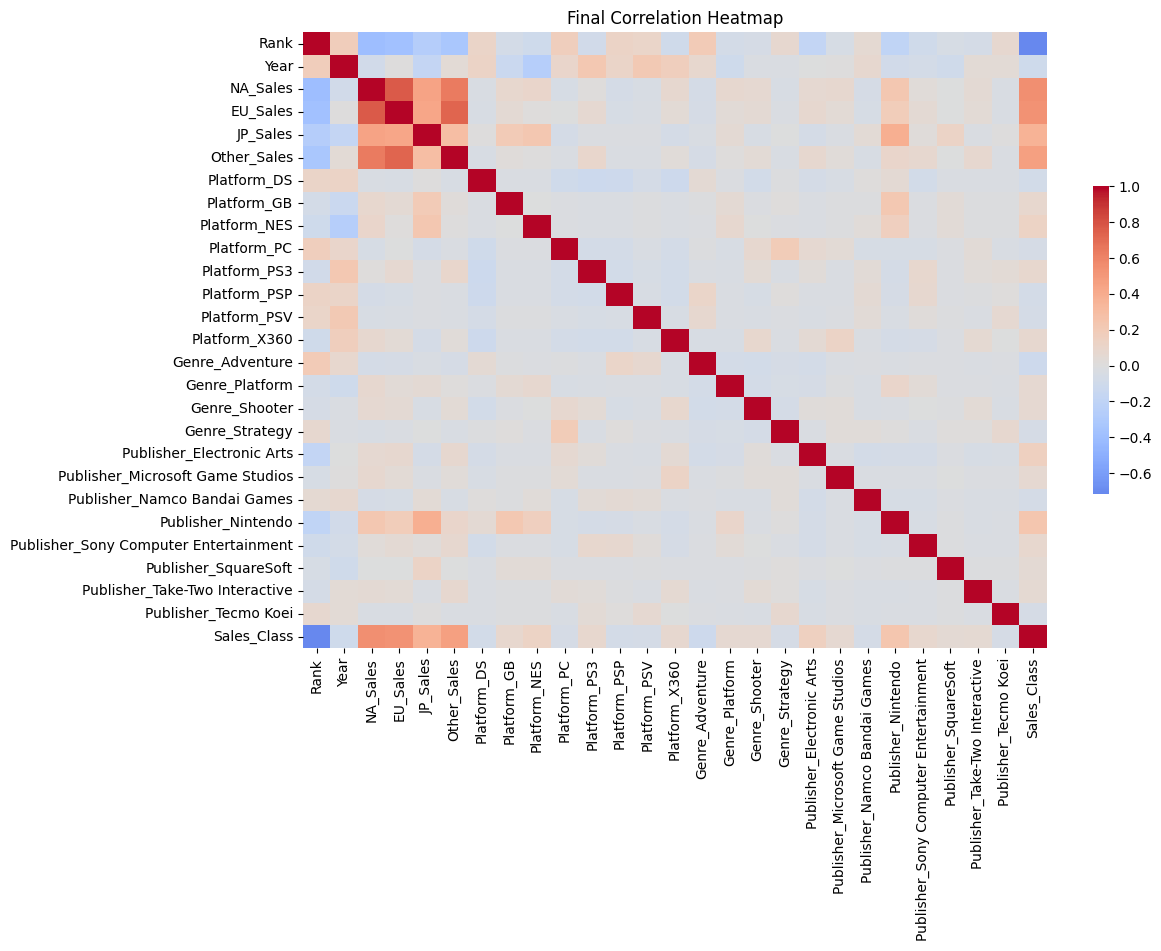

In [198]:
# แปลง categorical → dummy variables
categorical_cols = X.select_dtypes(include='object').columns.tolist()
X = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

# ------------------------
# Part 1: Explore correlation
# ------------------------
# คอลัมน์ constant
constant_cols = [col for col in X.columns if X[col].nunique() <= 1]
print("Constant columns:", constant_cols)

# correlation กับ target
X_corr = X.copy()
X_corr['Sales_Class'] = y_codes
corr_target = X_corr.corr()['Sales_Class']
low_corr_cols = corr_target[abs(corr_target) < 0.05].index.tolist()
print("Low correlation columns (<0.05) to consider dropping:", low_corr_cols)

# ------------------------
# Part 2: Select features
# ------------------------
X_fs = X.copy()
# ลบ constant + low correlation columns
X_fs.drop(columns=list(set(constant_cols + low_corr_cols)), inplace=True)

# ลบ features ที่ correlation กันสูง (>0.8)
corr_matrix = X_fs.corr().abs()
upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
high_corr_cols = [col for col in upper.columns if any(upper[col] > 0.8)]
X_fs.drop(columns=high_corr_cols, inplace=True)

final_features = X_fs.columns.tolist()
print("Number of features after selection:", len(final_features))
print("Selected features:", final_features)

# ------------------------
# Part 3: Recheck correlation heatmap
# ------------------------
X_fs['Sales_Class'] = y_codes
plt.figure(figsize=(12,8))
sns.heatmap(X_fs.corr(), cmap='coolwarm', center=0, cbar_kws={'shrink':0.5})
plt.title("Final Correlation Heatmap")
plt.show()


## Model Training

In [234]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# -----------------------------
# 1. เลือก features + target
# -----------------------------
exclude_columns = ['Name', 'Global_Sales', 'Sales_Class']
features = [col for col in df_clean.columns if col not in exclude_columns]

X = df_clean[features]
y = df_clean['Sales_Class']

# -----------------------------
# 2. แปลง categorical เป็น dummy (ถ้ายังไม่ทำ)
# -----------------------------
X = pd.get_dummies(X, drop_first=True)

# -----------------------------
# 3. Train-Test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 4. ลบแถวที่มี NaN ใน X พร้อม align y
# -----------------------------
mask_train = X_train.notna().all(axis=1)
X_train_clean = X_train[mask_train]
y_train_clean = y_train[mask_train]

mask_test = X_test.notna().all(axis=1)
X_test_clean = X_test[mask_test]
y_test_clean = y_test[mask_test]

# -----------------------------
# 5. เพิ่ม constant
# -----------------------------
X_train_const = sm.add_constant(X_train_clean)
X_test_const  = sm.add_constant(X_test_clean)

# -----------------------------
# 6. แปลงทั้งหมดเป็น float
# -----------------------------
X_train_const = X_train_const.astype(float)
X_test_const  = X_test_const.astype(float)

# -----------------------------
# 7. แปลง target เป็น integer codes
# -----------------------------
y_train_codes = pd.Categorical(y_train_clean).codes
y_test_codes  = pd.Categorical(y_test_clean).codes

# -----------------------------
# 8. Fit Multinomial Logit
# -----------------------------
model = sm.MNLogit(y_train_codes, X_train_const)
result = model.fit(maxiter=100)

# -----------------------------
# 9. Summary
# -----------------------------
print(result.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


Optimization terminated successfully.
         Current function value: nan
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                13059
Model:                        MNLogit   Df Residuals:                    11879
Method:                           MLE   Df Model:                         1178
Date:                Thu, 25 Sep 2025   Pseudo R-squ.:                     nan
Time:                        21:58:47   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -8803.0
Covariance Type:            nonrobust   LLR p-value:                       nan
                                             y=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                

In [259]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# -------------------------
# 1. เลือก features + label
# -------------------------
exclude_columns = ['Name', 'Global_Sales', 'Sales_Class']
features = [x for x in df_clean.columns if x not in exclude_columns]

X = df_clean[features]
y = df_clean['Sales_Class']

# -------------------------
# 2. แปลง categorical → dummy
# -------------------------
X = pd.get_dummies(X, drop_first=True)

# -------------------------
# 3. Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 4. เติมค่า NaN
# -------------------------
imputer = SimpleImputer(strategy='mean')  # numeric
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# -------------------------
# 5. Scale numeric columns
# -------------------------
numeric_cols = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Rank']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])

# -------------------------
# 6. Train Logistic Regression
# -------------------------
clf = LogisticRegression(max_iter=1000, multi_class='multinomial')
clf.fit(X_train, y_train)

# -------------------------
# 7. Predict + Evaluate
# -------------------------
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9951807228915662

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2531
           1       0.99      0.98      0.99       620
           2       0.99      0.99      0.99       169

    accuracy                           1.00      3320
   macro avg       0.99      0.99      0.99      3320
weighted avg       1.00      1.00      1.00      3320


Confusion Matrix:
 [[2526    5    0]
 [   8  610    2]
 [   0    1  168]]


## Model Evaluation

Evaluate training set

In [271]:
# -------------------------
# 1. Predict Training Set
# -------------------------
y_train_pred = clf.predict(X_train)
y_train_prob = clf.predict_proba(X_train)  # probability สำหรับ AUC

# Accuracy
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

# Classification Report
print("\nTrain Classification Report:\n", classification_report(y_train, y_train_pred))

# Confusion Matrix
cm_train = pd.DataFrame(
    confusion_matrix(y_train, y_train_pred),
    index=[f'Actual {cls}' for cls in clf.classes_],
    columns=[f'Predicted {cls}' for cls in clf.classes_]
)
cm_train.loc['Total'] = cm_train.sum(axis=0)
cm_train.loc[:, 'Total'] = cm_train.sum(axis=1)
print("\nTrain Confusion Matrix:\n", cm_train)

# Optional: AUC (multiclass)
try:
    auc_train = roc_auc_score(y_train, y_train_prob, multi_class='ovr')
    print(f"\nTrain AUC Score: {auc_train:.2f}")
except:
    print("\nTrain AUC Score: cannot compute for this multiclass setup")


Train Accuracy: 0.9978912486820304

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10120
           1       0.99      0.99      0.99      2481
           2       1.00      1.00      1.00       677

    accuracy                           1.00     13278
   macro avg       1.00      1.00      1.00     13278
weighted avg       1.00      1.00      1.00     13278


Train Confusion Matrix:
           Predicted 0  Predicted 1  Predicted 2  Total
Actual 0        10110           10            0  10120
Actual 1           14         2466            1   2481
Actual 2            0            3          674    677
Total           10124         2479          675  13278

Train AUC Score: 1.00


Evaluate test set

In [272]:
# -------------------------
# Predict Test Set
# -------------------------
y_test_pred = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)

# Accuracy
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))

# Classification Report
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
cm_test = pd.DataFrame(
    confusion_matrix(y_test, y_test_pred),
    index=[f'Actual {cls}' for cls in clf.classes_],
    columns=[f'Predicted {cls}' for cls in clf.classes_]
)
cm_test.loc['Total'] = cm_test.sum(axis=0)
cm_test.loc[:, 'Total'] = cm_test.sum(axis=1)
print("\nTest Confusion Matrix:\n", cm_test)

# Optional: AUC (multiclass)
try:
    auc_test = roc_auc_score(y_test, y_test_prob, multi_class='ovr')
    print(f"\nTest AUC Score: {auc_test:.2f}")
except:
    print("\nTest AUC Score: cannot compute for this multiclass setup")


Test Accuracy: 0.9951807228915662

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2531
           1       0.99      0.98      0.99       620
           2       0.99      0.99      0.99       169

    accuracy                           1.00      3320
   macro avg       0.99      0.99      0.99      3320
weighted avg       1.00      1.00      1.00      3320


Test Confusion Matrix:
           Predicted 0  Predicted 1  Predicted 2  Total
Actual 0         2526            5            0   2531
Actual 1            8          610            2    620
Actual 2            0            1          168    169
Total            2534          616          170   3320

Test AUC Score: 1.00
